Below, we have imported the Python libraries needed for this module. Run the code in this cell before running any other code cells, and be careful **not to change** any of the code.
You can run the cell in any of these ways:
 - Ctrl + Enter: Run the cell and keep the cursor in the same cell.
- Shift + Enter: Run the cell and move the cursor to the next cell.
- Click the Play button: Click the Run (play) button to the left of the cell to execute it.

In [1]:
# Run this cell before starting the module.
# It imports all of the libraries we will use.

import numpy as np
import pandas as pd
import otter

from scipy import stats
grader = otter.Notebook()

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid")
np.random.seed(42)

___
**Estimated Time:** ~45 minutes  
**Professor**: Alice Martinez <br>
**Developer:** Rinrada Maneenop
___

# Content Overview

- Introduction: What is a Confidence Interval?
- Confidence Intervals for a Population Mean
- Bootstrap Confidence Intervals
- Using Confidence Intervals to Test Hypotheses
- Interactive: How Sample Size and Confidence Level Affect Width
- Discussion and Reflection
- Conclusion

# Introduction: What is a Confidence Interval?

A **confidence interval** is a way to use data from a random sample to **estimate an unknown population parameter**, such as a population mean or proportion.

Instead of giving a single guess, we report a **range of plausible values** based on our sample. For example, we might say:

> "We are 95% confident that the average number of hours community college students study per week is between 9.2 and 11.8 hours."

In this statement:
- The **parameter** we care about is the *true average* study time for all students in the population.
- The **interval** (9.2, 11.8) is built using sample data and probability rules from statistics.

It is important to remember:
- The **interval estimates the parameter**, not individual data values.
- The **confidence level** (like 95%) describes the *method*, not a single interval. If we repeated the whole study many times, about 95% of the resulting intervals would contain the true parameter.

## A Common Misunderstanding

Suppose we build a 95% confidence interval for the **average age** of patients at a clinic and get something like (27.1, 29.4) years.

It is **not** correct to say:
> "95% of individual patients are between 27.1 and 29.4 years old."

That would confuse the **population distribution of ages** (which might be very spread out) with the **uncertainty in our estimate of the mean**.

What the interval *does* tell us is:
- We used a method that, in the long run, captures the true mean age about 95% of the time.
- For this particular sample, our best guess is that the true mean age is somewhere between 27.1 and 29.4 years.

So the **correct** way to say this is:
> We are **95% confident** that the **true mean (average) age** of patients at the clinic is between 27.1 and 29.4  years old

# Confidence Intervals for a Population Mean

In this section we will:
- Work with a sample of numerical data.
- Build a confidence interval for the **population mean** using the **standard normal distribution** from `scipy.stats`.
- Interpret the interval in plain language.

In [2]:
# Create a synthetic "population" of student study times (hours per week)
# This lets us simulate sampling from a larger population.

population_study_hours = np.random.gamma(shape=2.5, scale=1.5, size=10_000)

pd.Series(population_study_hours).describe()

count    10000.000000
mean         3.780661
std          2.342153
min          0.061167
25%          2.060406
50%          3.291257
75%          4.992449
max         21.910912
dtype: float64

In [3]:
# Take a simple random sample from the population

n = 60  # sample size
sample = np.random.choice(population_study_hours, size=n, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

n, sample_mean, sample_std

(60, np.float64(4.243293018098874), np.float64(2.4725823056790484))

### Formula for a Confidence Interval for the Mean

For a sample of size $n$ with sample mean $\bar{x}$ and sample standard deviation $s$, an approximate $100(1-\alpha)\%$ confidence interval for the **population mean** $\mu$ is:<br>
NOTE: $\alpha$ is the **significance level**, where the interval _does not_ contain the true mean

$$
\bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$


where:
- **$\bar{x}$** - sample mean
- **$n$** - sample size
- **$s$** - sample standard deviation
- **\( z \)**: The *critical value* from the **standard normal distribution**. This value determines how far from the mean you need to go to capture the desired confidence level.
- **Standard Error** ($\frac{s}{\sqrt{n}}$): Estimates how much the sample mean $\bar{x}$ would vary across repeated samples of size $n$.

We will use `scipy.stats.norm` to get \(z\) and then compute the interval in code.

### Two-tailed vs one-tailed

The formula above gives a **two-tailed** (two-sided) interval: we allow the true mean to be either *above* or *below* our sample mean, so we put half of α in each tail of the distribution. That’s why the code uses `1 - alpha/2` to get \(z\): we want 2.5% in the left tail and 2.5% in the right tail for a 95% CI. The result is an interval with **both** a lower and an upper bound: “the mean is between this and this.”

- **One-tailed** would mean we care about only one direction (e.g. “is the mean *greater than* some value?”). We’d put all of α in a single tail and get only one bound (either a lower bound or an upper bound), not a full interval.

In this notebook we use **two-tailed** intervals so we can say “the mean is between [lower] and [upper].”

**Exercise 1:** Fill in the `...` in the next cell to compute the 95% confidence interval using the formula $\bar{x} \pm z \cdot \frac{s}{\sqrt{n}}$.

In [4]:
# Exercise: Compute a 95% confidence interval for the population mean
# Fill in the ... with the correct expressions (see the formula above).

confidence_level = 0.95
alpha = 1 - confidence_level

# z critical value from the standard normal distribution (two-tailed: use 1 - alpha/2)
z = stats.norm.ppf(1 - alpha / 2)  # solution

standard_error = sample_std / np.sqrt(n)
ci_lower = sample_mean - z * standard_error  # solution
ci_upper = sample_mean + z * standard_error  # solution

(ci_lower, ci_upper)

(np.float64(3.6176548685458285), np.float64(4.86893116765192))

In [5]:
grader.check("q1")

q1 results: All test cases passed!

In [ ]:
assert np.isclose(z, stats.norm.ppf(1 - 0.05/2))

In [ ]:
standard_error = sample_std / np.sqrt(n)
assert np.isclose(ci_lower, sample_mean - z * standard_error)
assert np.isclose(ci_upper, sample_mean + z * standard_error)

### Interpreting the Interval

If this sample came from all community college students at your school, we might say:

> "Based on our sample, we are 95% confident that the **average number of hours students study per week** is between the lower and upper endpoints we just computed."

This does **not** mean that there is a 95% chance that the true mean is in *this exact* interval. Instead, it means that we are using a method that, in the long run, captures the true mean about 95% of the time.

# Bootstrap Confidence Intervals

The formula above relies on theoretical assumptions (for example, that the sampling distribution of the mean is roughly bell-shaped). When the sample size is small or the data are clearly skewed, a **bootstrap confidence interval** can be a helpful alternative.

The idea of the bootstrap is:
- Treat your original sample as if it were the population.
- **Resample with replacement** from the sample many times.
- For each resample, compute the statistic of interest (here, the mean).
- Use the distribution of these *bootstrap statistics* to build a confidence interval.

**Exercise 2:** Complete the `bootstrap_mean` function (resample and mean) and the `np.percentile` call for the 95% bootstrap CI.

In [6]:
# Exercise: Complete the bootstrap function and compute a 95% bootstrap CI.
# Fill in the ... below.

def bootstrap_mean(data, reps=5000):
    """Return an array of bootstrap sample means using NumPy."""
    n = len(data)
    means = []
    for _ in range(reps):
        resample = np.random.choice(data, size=n, replace=True)  # resample with replacement from data, size n  # solution
        means.append(np.mean(resample))  # mean of the resample  # solution
    return np.array(means)

boot_means = bootstrap_mean(sample, reps=5000)

# 95% CI: use percentiles so 2.5% is below and 2.5% is above
boot_ci_lower, boot_ci_upper = np.percentile(boot_means, [2.5, 97.5])  # solution
boot_ci_lower, boot_ci_upper

(np.float64(3.666441669646914), np.float64(4.909464180799429))

In [7]:
grader.check("q2")

q2 results: All test cases passed!

In [ ]:
len(boot_means) == 5000

In [ ]:
np.isclose(boot_ci_lower, np.percentile(boot_means, 2.5)) and np.isclose(boot_ci_upper, np.percentile(boot_means, 97.5))

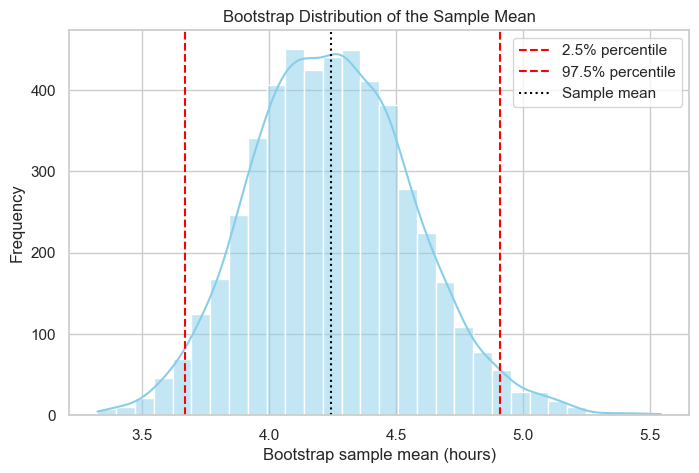

In [8]:
# Visualize the bootstrap distribution of the sample mean

plt.figure(figsize=(8, 5))
sns.histplot(boot_means, bins=30, kde=True, color="skyblue")
plt.axvline(boot_ci_lower, color="red", linestyle="--", label="2.5% percentile")
plt.axvline(boot_ci_upper, color="red", linestyle="--", label="97.5% percentile")
plt.axvline(sample_mean, color="black", linestyle=":", label="Sample mean")
plt.xlabel("Bootstrap sample mean (hours)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of the Sample Mean")
plt.legend()
plt.show()

The vertical red lines mark the endpoints of a **95% bootstrap confidence interval** for the population mean study time.

Notice that this interval is built using the **empirical distribution** of the bootstrap means, not directly from a theoretical t distribution. Both methods are implemented using the same core tools you have seen elsewhere in this course: `numpy` for sampling and `scipy.stats` for probability calculations.

# Using Confidence Intervals to Test Hypotheses

Confidence intervals are not only useful for estimation; they are also closely connected to **hypothesis tests**.

Suppose we want to test:
- **Null hypothesis \(H_0\)**: The average drop in a health score after treatment is \(0\) (no change on average).
- **Alternative hypothesis \(H_1\)**: The average drop is **not** 0.

If a **95% confidence interval for the mean drop** does **not** contain 0, then a two-sided hypothesis test at the 5% significance level would reject \(H_0\). This is the practical "duality" between confidence intervals and two-sided tests.

In [9]:
# Simulate paired health scores before and after a treatment

n_patients = 30

# Baseline scores (higher = better health)
baseline = np.random.normal(loc=80, scale=8, size=n_patients)

# Treatment tends to lower the score by about 10 points on average
post_treatment = baseline - np.random.normal(loc=10, scale=5, size=n_patients)

# Drop = baseline - post (positive means health worsened)
drop = baseline - post_treatment

health_df = pd.DataFrame({
    "baseline": baseline,
    "post_treatment": post_treatment,
    "drop": drop,
})

health_df.head()

,baseline,post_treatment,drop
0,82.964869,80.626593,2.338276
1,63.460025,59.514138,3.945887
2,66.817827,55.691604,11.126224
3,86.797889,83.094152,3.703738
4,85.098367,84.510551,0.587815


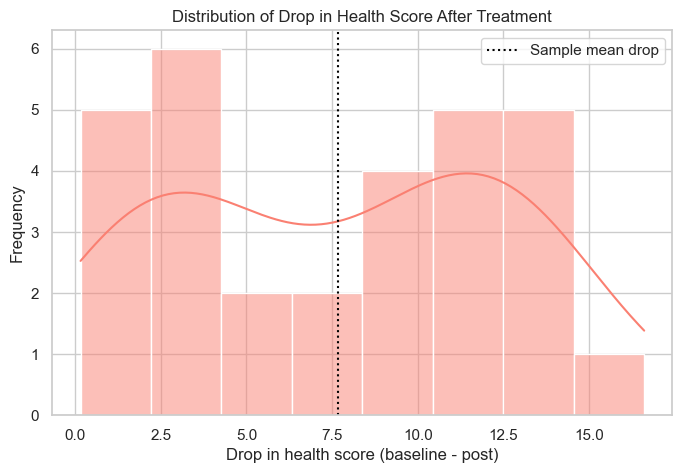

np.float64(7.663280509433109)

In [10]:
# Look at the distribution of the drop scores

plt.figure(figsize=(8, 5))
sns.histplot(drop, bins=8, kde=True, color="salmon")
plt.axvline(np.mean(drop), color="black", linestyle=":", label="Sample mean drop")
plt.xlabel("Drop in health score (baseline - post)")
plt.ylabel("Frequency")
plt.title("Distribution of Drop in Health Score After Treatment")
plt.legend()
plt.show()

np.mean(drop)

**Reading the plot:** The **salmon-colored smooth curve** (the KDE, or kernel density estimate) shows the *shape* of the distribution of drop scores. It smooths the histogram so you can more easily see where values are concentrated and whether the distribution is roughly symmetric or skewed. The **black dotted vertical line** is the **sample mean** drop in health score—the average change across all patients in the sample.

In [11]:
# Exercise 3: Bootstrap confidence interval for the mean drop
# Fill in the percentile list for a 95% CI (same idea as Exercise 2).

boot_drop_means = bootstrap_mean(drop, reps=5000)

ci_drop_lower, ci_drop_upper = np.percentile(boot_drop_means, [2.5, 97.5])  # solution
ci_drop_lower, ci_drop_upper

(np.float64(5.9310776692815885), np.float64(9.46908481448835))

In [12]:
grader.check("q3")

q3 results: All test cases passed!

In [ ]:
np.isclose(ci_drop_lower, np.percentile(boot_drop_means, 2.5)) and np.isclose(ci_drop_upper, np.percentile(boot_drop_means, 97.5))

Look at the interval endpoints you just computed.

- If **0 is inside** the 95% bootstrap confidence interval for the mean drop, then a two-sided test at the 5% level would **not** find strong evidence that the average drop is different from 0.
- If **0 is outside** the interval, then a two-sided test at the 5% level would **reject** the null hypothesis that the average drop is 0.

In practice, checking whether the null value lies in a 95% confidence interval is often easier and more informative than computing a separate test statistic and p-value.

# Interactive: Sample Size, Confidence Level, and Interval Width

Now we will use widgets to see how the width of a confidence interval changes when we:
- Increase or decrease the **sample size** \(n\).
- Increase or decrease the **confidence level** (for example, from 90% to 99%).

Use the sliders below to experiment and watch what happens to the interval.

In [13]:
from functions.interact import interact_ci

interact_ci(population_study_hours)

As you experiment, look for these patterns:

- **Larger sample size** \(n\) usually makes the interval **narrower** (more precise).
- **Higher confidence level** (for example, 99% instead of 90%) makes the interval **wider** (more cautious), because we are asking for more "coverage" of the true parameter.

This trade-off between **certainty** and **precision** is central to how confidence intervals are used in practice.

# Discussion and Reflection

**Short Answer:** In your own words, describe what a 95% confidence interval for a population mean tells you. Why is it incorrect to say that 95% of individual observations fall inside the interval?

**Type your answer below.**

A 95% confidence interval for a population mean gives a range of plausible values for the **true mean** based on our sample, constructed by a method that would capture the true mean in about 95% of repeated samples.

It does **not** describe where individual data points fall: individual observations can be far below or above the interval. The 95% refers to long-run coverage of the **parameter** (the mean), not to 95% of individual observations lying inside the interval.

### Run the cell below to check your answers

After completing Exercises 1–3, run the next cell. Use `grader.check("q1")`, `grader.check("q2")`, `grader.check("q3")` to check each exercise, or `grader.check_all()` to run all tests at once (recommended before submitting).

In [14]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

## 📋 Post-Notebook Reflection Form

Thank you for completing the notebook! We’d love to hear your thoughts so we can continue improving and creating content that supports your learning.

If your instructor provides a reflection form link, you can add it here, for example:

👉 **[Click here to fill out the Reflection Form](https://forms.gle/zzscnaTcu8Nor2Xz6)**

---

### 🧠 Why it matters:
Your feedback helps us understand:
- How clear and helpful the notebook was
- What you learned from the experience
- How your views on statistics and data might have changed
- What topics you’d like to see in the future

This form is optional and should take less than 5 minutes to complete.

# Conclusion

In this notebook, you:
- Learned how confidence intervals use sample data to estimate unknown population parameters.
- Built confidence intervals for a mean using both **t-based formulas** and **bootstrap methods** with `numpy` and `scipy.stats`.
- Saw how confidence intervals connect to hypothesis tests and how their width depends on sample size and confidence level.

These tools are central to inferential statistics and will reappear whenever you use data to make claims about a broader population.

**Note:** The histogram of the sample does *not* need to be normally distributed. The confidence interval is for the **mean**, and it is valid because the *sampling distribution* of the sample mean is approximately normal when the sample size is large enough (by the **Central Limit Theorem**), even if the population—or a single sample—looks skewed or non-normal.